<a href="https://colab.research.google.com/github/S-47/hotel_booking_prediction/blob/main/hotel_booking_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**READ DATA**

In [3]:
df=pd.read_csv('/content/drive/MyDrive/hotel_bookings.csv')

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


**DATA CLEANING**

In [6]:
df.shape

(119390, 32)

In [7]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
df.drop(['agent', 'company'], axis=1, inplace=True)

In [9]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [10]:
df['country'].value_counts().index[0]

'PRT'

In [11]:
df['country'].fillna(df['country'].value_counts().index[0], inplace=True)

In [12]:
df.fillna(0, inplace=True)

In [13]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [14]:
filter1=(df['children']==0) & (df['adults']==0) & (df['babies']==0)

In [15]:
df[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [16]:
df[~filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [17]:
data=df[~filter1]

In [18]:
data.shape

(119210, 30)

**SPATIAL ANALYSIS**

In [19]:
data['is_canceled'].unique()

array([0, 1])

In [20]:
len(data[data['is_canceled']==0])

75011

In [21]:
country_wise_data=data[data['is_canceled']==0]['country'].value_counts().reset_index()

In [22]:
country_wise_data.columns=['country', 'no_of_guests']
country_wise_data

,country,no_of_guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [23]:
import plotly 

In [24]:
import plotly.express as px

**HOW MUCH DO GUESTS PAY FOR A ROOM PER NIGHT?**

In [25]:
data2=data[data['is_canceled']==0]

In [26]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0, 0.5, 'price (EUR)')

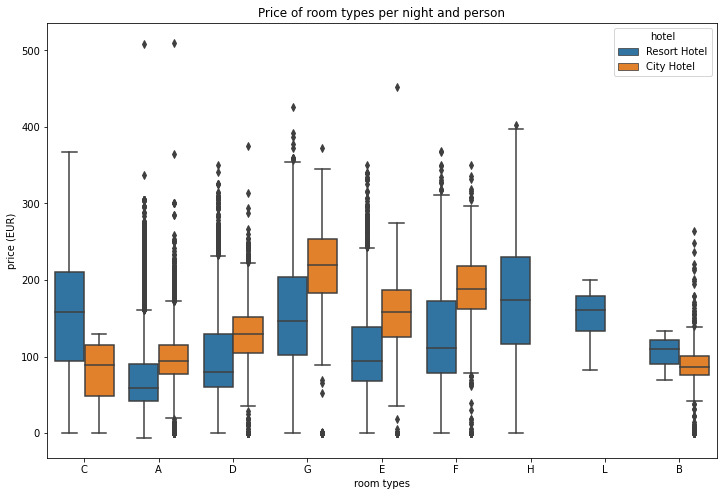

In [27]:
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type', y='adr', hue='hotel', data=data2)

plt.title('Price of room types per night and person')
plt.xlabel('room types')
plt.ylabel('price (EUR)')

**THE MOST BUSY MONTH**

In [28]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [29]:
data_resort=data[(data['hotel']=='Resort Hotel') & (data['is_canceled']==0)]

data_city=data[(data['hotel']=='City Hotel') & (data['is_canceled']==0)]

In [30]:
rush_resort=data_resort['arrival_date_month'].value_counts().reset_index()

rush_resort.columns=['month', 'no_of_guests']

rush_resort

,month,no_of_guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [31]:
rush_city=data_city['arrival_date_month'].value_counts().reset_index()

rush_city.columns=['month', 'no_of_guests']

rush_city

,month,no_of_guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [32]:
final_rush=rush_resort.merge(rush_city, on='month')

In [33]:
final_rush.columns=['month', 'no_of_guests_in_resort', 'no_of_guests_city']

In [34]:
final_rush

,month,no_of_guests_in_resort,no_of_guests_city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [35]:
!pip install sorted-months-weekdays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3246 sha256=9db947b59759e63148a793a7cb80d3063a80cd374a1086220889e3942df08001
  Stored in directory: /root/.cache/pip/wheels/9a/0d/2e/309df76f445367ea1777b73df0feb347b9c8d204ead35fdb10
Successfully built sorted-months-weekdays


In [36]:
!pip install sort_dataframeby_monthorweek

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sort_dataframeby_monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3441 sha256=3587569c845b3f4efbd08b9b8baadba404b0a9430157cba23311ca4cee3398d2
  Stored in directory: /root/.cache/pip/wheels/f8/84/15/465a1c7eabab8605e82621b7aa658c99010f3564a43ccd06aa
Successfully built sort_dataframeby_monthorweek


In [37]:
import sort_dataframeby_monthorweek as sd

In [38]:
final_rush=sd.Sort_Dataframeby_Month(final_rush, 'month')

In [39]:
px.line(data_frame=final_rush, x='month', y=['no_of_guests_in_resort', 'no_of_guests_city'])

**WHICH MONTH HAS HIGHEST ADR?**

In [40]:
data=sd.Sort_Dataframeby_Month(data, 'arrival_date_month')

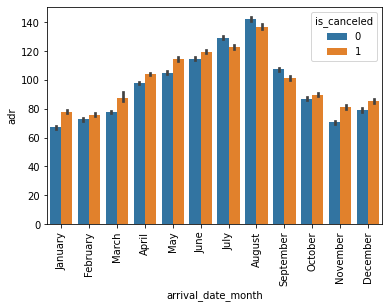

In [41]:
sns.barplot(x='arrival_date_month', y='adr', data=data, hue='is_canceled')

plt.xticks(rotation='vertical')

plt.show()

**WERE THE BOOKINGS MADE ONLY FOR WEEKDAYS OR FOR WEEKENDS OR FOR BOTH?**

In [42]:
pd.crosstab(index=data['stays_in_weekend_nights'], columns=data['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,645,16436,17949,11557,4478,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
def week_function(row):
  feature1='stays_in_weekend_nights'
  feature2='stays_in_week_nights'

  if row[feature2]==0 and row[feature1]>0:
    return 'stay_just_weekend'

  elif row[feature2]>0 and row[feature1]==0:
    return 'stay_just_weekdays'

  elif row[feature2]>0 and row[feature1]>0:
    return 'stay_both_weekdays_weekends'

  else:
    return 'undefined_data'

In [44]:
data2['weekend_or_weekday']=data2.apply(week_function, axis=1)

In [45]:
data2.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data


In [46]:
data2['weekend_or_weekday'].value_counts()

stay_both_weekdays_weekends    37551
stay_just_weekdays             31788
stay_just_weekend               5050
undefined_data                   622
Name: weekend_or_weekday, dtype: int64

In [48]:
sorted_data=sd.Sort_Dataframeby_Month(data2, 'arrival_date_month')

In [49]:
data2.groupby(['arrival_date_month', 'weekend_or_weekday']).size()

arrival_date_month  weekend_or_weekday         
April               stay_both_weekdays_weekends    3627
                    stay_just_weekdays             2559
                    stay_just_weekend               344
                    undefined_data                   30
August              stay_both_weekdays_weekends    4929
                    stay_just_weekdays             3137
                    stay_just_weekend               509
                    undefined_data                   49
December            stay_both_weekdays_weekends    1901
                    stay_just_weekdays             2123
                    stay_just_weekend               298
                    undefined_data                   69
February            stay_both_weekdays_weekends    2438
                    stay_just_weekdays             2514
                    stay_just_weekend               360
                    undefined_data                   47
January             stay_both_weekdays_weekends    1550


In [50]:
group_data=data2.groupby(['arrival_date_month', 'weekend_or_weekday']).size().unstack().reset_index()

In [51]:
sorted_data=sd.Sort_Dataframeby_Month(group_data, 'arrival_date_month')

In [52]:
sorted_data.set_index('arrival_date_month', inplace=True)

In [53]:
sorted_data

,stay_both_weekdays_weekends,stay_just_weekdays,stay_just_weekend,undefined_data
arrival_date_month,,,,
January,1550,2125,393,47
February,2438,2514,360,47
March,3151,3060,359,50
April,3627,2559,344,30
May,3442,3017,570,74
June,3241,2685,433,36
July,4570,2818,462,57
August,4929,3137,509,49
September,3192,2692,479,22


<AxesSubplot:xlabel='arrival_date_month'>

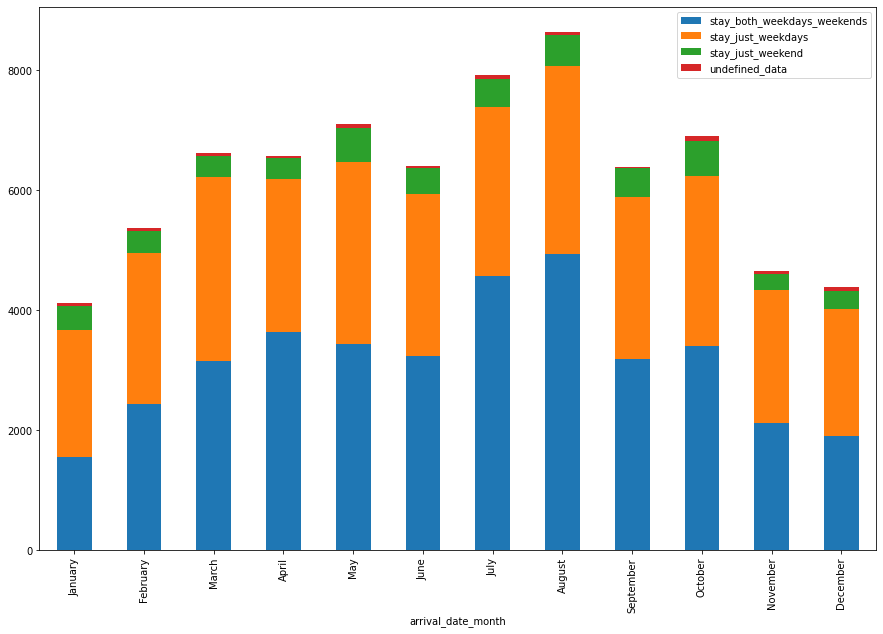

In [54]:
sorted_data.plot(kind='bar', stacked=True, figsize=(15,10))

**CREATE SOME MORE FEATURE**

In [55]:
def family(row):
  if (row['adults']>0) &  (row['children']>0 or row['babies']>0) :
    return 1
  else:
    return 0  

In [56]:
data['is_family']=data.apply(family, axis=1)

In [57]:
data['total_customer']=data['adults'] + data['babies'] + data['children']

In [58]:
data['total_nights']=data['stays_in_week_nights'] + data['stays_in_weekend_nights']

In [59]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1,4.0,1
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,...,0,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1
3,Resort Hotel,0,88,2016,January,1,1,0,2,2,...,0,Transient,73.46,0,2,Check-Out,1/3/2016,0,2.0,2
4,Resort Hotel,1,20,2016,January,1,1,0,2,2,...,0,Transient,119.00,0,0,Canceled,12/22/2015,1,4.0,2


In [60]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights'],
      dtype='object')

In [61]:
data['deposit_type'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [62]:
dicti={'No Deposit':0 , 'Non Refund':1, 'Refundable':0}

In [63]:
data['deposit_given']=data['deposit_type'].map(dicti)

In [64]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [65]:
data.drop(columns=['adults', 'children', 'babies', 'deposit_type'], axis=1, inplace=True)

In [66]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

**FEATURE ENCODING**

In [67]:
data.head(6)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights,deposit_given
0,Resort Hotel,0,109,2016,January,1,1,0,1,BB,...,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1,0
1,Resort Hotel,0,109,2016,January,1,1,0,1,BB,...,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1,4.0,1,0
2,Resort Hotel,1,2,2016,January,1,1,0,1,BB,...,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1,0
3,Resort Hotel,0,88,2016,January,1,1,0,2,HB,...,Transient,73.46,0,2,Check-Out,1/3/2016,0,2.0,2,0
4,Resort Hotel,1,20,2016,January,1,1,0,2,BB,...,Transient,119.00,0,0,Canceled,12/22/2015,1,4.0,2,0
5,Resort Hotel,1,76,2016,January,1,1,1,2,BB,...,Transient,57.90,0,1,Canceled,12/20/2015,0,2.0,3,0


In [68]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests         

In [69]:
cate_features=[col for col in data.columns if data[col].dtype=='object']

In [70]:
cate_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [71]:
data[cate_features]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,Transient-Party,Check-Out,1/2/2016
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,Transient-Party,Check-Out,1/2/2016
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,Transient,No-Show,1/1/2016
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,Transient,Check-Out,1/3/2016
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,Transient,Canceled,12/22/2015
...,...,...,...,...,...,...,...,...,...,...,...
119205,City Hotel,December,BB,BRA,Direct,Direct,E,F,Transient,Check-Out,1/6/2017
119206,City Hotel,December,SC,FRA,Online TA,TA/TO,A,A,Transient,Check-Out,1/6/2017
119207,City Hotel,December,BB,FRA,Offline TA/TO,TA/TO,A,B,Transient,Check-Out,1/7/2017
119208,City Hotel,December,SC,DEU,Online TA,TA/TO,A,A,Transient-Party,Check-Out,1/8/2017


In [72]:
num_features=[col for col in data.columns if data[col].dtype!='object']

In [73]:
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_family',
 'total_customer',
 'total_nights',
 'deposit_given']

In [74]:
data[num_features]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0,109,2016,1,1,0,1,0,0,0,0,0,59.94,0,1,0,2.0,1,0
1,0,109,2016,1,1,0,1,0,0,0,0,0,116.10,1,1,1,4.0,1,0
2,1,2,2016,1,1,0,1,0,0,0,0,0,89.00,0,1,0,2.0,1,0
3,0,88,2016,1,1,0,2,0,0,0,0,0,73.46,0,2,0,2.0,2,0
4,1,20,2016,1,1,0,2,0,0,0,0,0,119.00,0,0,1,4.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0,173,2016,53,26,3,8,0,0,0,4,0,117.82,0,1,1,3.0,11,0
119206,0,17,2016,53,30,2,5,0,0,0,0,0,90.34,0,1,0,2.0,7,0
119207,0,107,2016,53,31,2,5,0,0,0,0,0,103.57,0,0,0,2.0,7,0
119208,0,310,2016,53,27,2,10,0,0,0,2,0,68.57,0,2,0,2.0,12,0


In [75]:
data.groupby(['hotel'])['is_canceled'].mean().to_dict()

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}

In [76]:
data_cat=data[cate_features]

In [77]:
import warnings
warnings.filterwarnings("ignore")

In [78]:
data_cat['cancellation']=data['is_canceled']

In [79]:
cols=data_cat.columns

In [80]:
cols[0:-1]

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')

In [81]:
for col in cols:
  dict2=data_cat.groupby([col])['cancellation'].mean().to_dict()
  data_cat[col]=data_cat[col].map(dict2)

In [82]:
data_cat.head(2)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0.0,0.048276,0.0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0.0,0.048276,0.0


**HANDLE OUTLIERS**

In [83]:
dataframe=pd.concat([data_cat, data[num_features]], axis=1)

In [84]:
dataframe

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277674,0.305016,0.374106,0.379365,0.367590,0.410598,0.391567,0.251373,0.254504,0.0,...,0,0,0,59.94,0,1,0,2.0,1,0
1,0.277674,0.305016,0.374106,0.379365,0.367590,0.410598,0.407654,0.352528,0.254504,0.0,...,0,0,0,116.10,1,1,1,4.0,1,0
2,0.277674,0.305016,0.374106,0.562958,0.367590,0.410598,0.318108,0.251373,0.407864,1.0,...,0,0,0,89.00,0,1,0,2.0,1,0
3,0.277674,0.305016,0.344653,0.252336,0.367590,0.410598,0.391567,0.251373,0.407864,0.0,...,0,0,0,73.46,0,2,0,2.0,2,0
4,0.277674,0.305016,0.374106,0.562958,0.367590,0.410598,0.364723,0.306002,0.407864,1.0,...,0,0,0,119.00,0,0,1,4.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0.417859,0.350348,0.374106,0.373537,0.153712,0.174868,0.292683,0.247134,0.407864,0.0,...,0,4,0,117.82,0,1,1,3.0,11,0
119206,0.417859,0.350348,0.374064,0.185848,0.367590,0.410598,0.391567,0.445055,0.407864,0.0,...,0,0,0,90.34,0,1,0,2.0,7,0
119207,0.417859,0.350348,0.374106,0.185848,0.343313,0.410598,0.391567,0.237233,0.407864,0.0,...,0,0,0,103.57,0,0,0,2.0,7,0
119208,0.417859,0.350348,0.374064,0.167193,0.367590,0.410598,0.391567,0.445055,0.254504,0.0,...,0,2,0,68.57,0,2,0,2.0,12,0


In [85]:
dataframe.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [86]:
dataframe.drop(['cancellation'], axis=1, inplace=True)

In [87]:
dataframe.head(2)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0.0,...,0,0,0,59.94,0,1,0,2.0,1,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0.0,...,0,0,0,116.10,1,1,1,4.0,1,0


<AxesSubplot:xlabel='lead_time', ylabel='Density'>

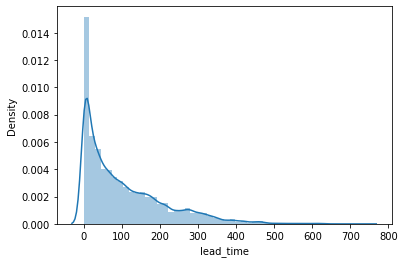

In [88]:
sns.distplot(dataframe['lead_time'])

In [89]:
def handle_outlier(col):
  dataframe[col]=np.log1p(dataframe[col])

In [90]:
handle_outlier('lead_time')

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

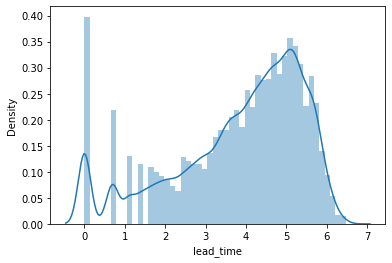

In [91]:
sns.distplot(dataframe['lead_time'])

<AxesSubplot:xlabel='adr', ylabel='Density'>

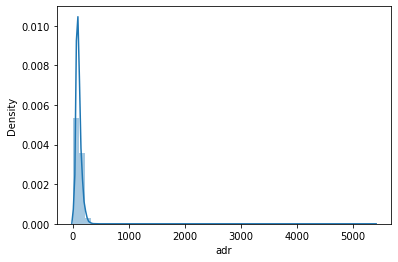

In [92]:
sns.distplot(dataframe['adr'])

In [93]:
dataframe[dataframe['adr']<0]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
14989,0.277674,0.322277,0.374106,0.20231,0.611086,0.174868,0.391567,0.352528,0.254504,0.0,...,2,2,0,-6.38,0,0,0,2.0,10,0


In [94]:
handle_outlier('adr')

In [95]:
dataframe['adr'].isnull().sum()

1

<AxesSubplot:xlabel='adr', ylabel='Density'>

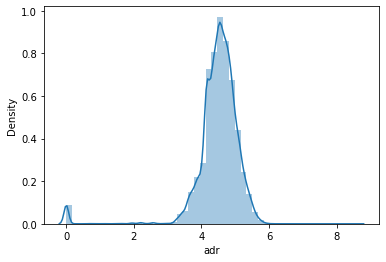

In [96]:
sns.distplot(dataframe['adr'].dropna())

**SELECT IMPORTANT FEATURES USING CO-RELATION AND UNIVARIATE ANALYSIS**

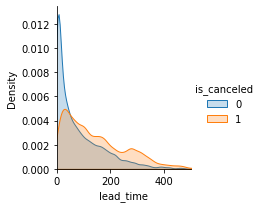

In [97]:
sns.FacetGrid(data, hue='is_canceled', xlim=(0,500)).map(sns.kdeplot, 'lead_time', shade=True).add_legend()

In [98]:
corr=dataframe.corr()

In [99]:
corr

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
hotel,1.000000,0.051197,0.061782,-0.040609,0.102592,0.182266,0.198171,0.280884,-0.008378,0.137082,...,-0.004467,-0.076598,0.072725,0.154041,-0.218961,-0.043478,-0.058094,-0.038762,-0.249747,0.172415
arrival_date_month,0.051197,1.000000,-0.010208,-0.052405,0.047902,0.077075,-0.038801,0.015456,-0.029636,0.069886,...,-0.021971,-0.011049,0.029164,0.228179,-0.021910,0.002763,0.020491,0.079090,0.045648,0.057361
meal,0.061782,-0.010208,1.000000,0.022476,-0.026007,-0.025486,0.010035,0.013913,0.105767,0.050584,...,0.011109,-0.027189,-0.031562,-0.019908,0.003455,0.006875,0.001466,-0.003447,-0.055689,0.047597
country,-0.040609,-0.052405,0.022476,1.000000,0.078982,-0.129774,0.153177,0.125415,-0.029320,0.357232,...,0.091795,-0.061513,0.067054,-0.160520,0.007613,-0.200822,-0.044139,-0.117351,-0.160759,0.395685
market_segment,0.102592,0.047902,-0.026007,0.078982,1.000000,0.540116,0.182813,0.209272,-0.265606,0.267006,...,-0.117519,-0.057578,0.096385,-0.004009,-0.145726,-0.155463,-0.104584,-0.023874,-0.004546,0.397229
distribution_channel,0.182266,0.077075,-0.025486,-0.129774,0.540116,1.000000,0.070381,0.118970,-0.023234,0.177167,...,-0.142650,-0.118461,0.048001,0.126516,-0.146562,0.075047,-0.026278,0.087776,0.084999,0.115160
reserved_room_type,0.198171,-0.038801,0.010035,0.153177,0.182813,0.070381,1.000000,0.722724,-0.143390,0.072769,...,0.022533,-0.040134,0.068336,-0.185932,-0.093401,-0.161406,-0.133748,-0.246347,-0.188866,0.201923
assigned_room_type,0.280884,0.015456,0.013913,0.125415,0.209272,0.118970,0.722724,1.000000,-0.084025,0.201570,...,-0.003205,-0.096277,0.067129,-0.038347,-0.131035,-0.135337,-0.179356,-0.229081,-0.103571,0.263383
customer_type,-0.008378,-0.029636,0.105767,-0.029320,-0.265606,-0.023234,-0.143390,-0.084025,1.000000,0.136617,...,0.024716,-0.095486,-0.101833,0.117592,0.061786,0.137114,0.106618,0.124318,0.037720,0.121789
reservation_status,0.137082,0.069886,0.050584,0.357232,0.267006,0.177167,0.072769,0.201570,0.136617,1.000000,...,-0.057365,-0.144832,0.054301,0.081660,-0.195701,-0.234877,-0.013226,0.044826,0.018554,0.481507


In [100]:
corr['is_canceled'].sort_values(ascending=False)

reservation_status                1.000000
is_canceled                       1.000000
reservation_status_date           0.488307
deposit_given                     0.481507
country                           0.357232
lead_time                         0.320075
market_segment                    0.267006
assigned_room_type                0.201570
distribution_channel              0.177167
hotel                             0.137082
customer_type                     0.136617
previous_cancellations            0.110139
adr                               0.081660
reserved_room_type                0.072769
arrival_date_month                0.069886
days_in_waiting_list              0.054301
meal                              0.050584
total_customer                    0.044826
stays_in_week_nights              0.025542
total_nights                      0.018554
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
stays_in_weekend_nights          -0.001323
arrival_dat

In [101]:
corr['is_canceled'].sort_values(ascending=False).index

Index(['reservation_status', 'is_canceled', 'reservation_status_date',
       'deposit_given', 'country', 'lead_time', 'market_segment',
       'assigned_room_type', 'distribution_channel', 'hotel', 'customer_type',
       'previous_cancellations', 'adr', 'reserved_room_type',
       'arrival_date_month', 'days_in_waiting_list', 'meal', 'total_customer',
       'stays_in_week_nights', 'total_nights', 'arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month', 'is_family',
       'previous_bookings_not_canceled', 'is_repeated_guest',
       'booking_changes', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [102]:
features_to_drop=['reservation_status', 'reservation_status_date', 'arrival_date_year', 'arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_day_of_month']

In [103]:
dataframe.drop(features_to_drop, axis=1, inplace=True)

In [104]:
dataframe.shape

(119210, 24)

**IMPORTANT FEATURES FOR MODEL BUILDING**

In [105]:
dataframe.dropna(inplace=True)

In [106]:
x=dataframe.drop('is_canceled', axis=1)

In [107]:
y=dataframe['is_canceled']

In [108]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [109]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005))

In [110]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [111]:
feature_sel_model.get_support()

array([False, False, False,  True, False, False, False, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True])

In [112]:
cols=x.columns

In [113]:
selected_feature=cols[feature_sel_model.get_support()]

In [114]:
selected_feature

Index(['country', 'lead_time', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_customer', 'total_nights',
       'deposit_given'],
      dtype='object')

In [115]:
x=x[selected_feature]

In [116]:
y

0         0
1         0
2         1
3         0
4         1
         ..
119205    0
119206    0
119207    0
119208    0
119209    0
Name: is_canceled, Length: 119209, dtype: int64

**MACHINE LEARNING MODEL**

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test =train_test_split(x, y , test_size=0.25)

In [119]:
X_train.shape

(89406, 12)

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
logreg=LogisticRegression()

In [122]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [123]:
pred=logreg.predict(X_test)

In [124]:
pred

array([1, 0, 0, ..., 0, 0, 1])

In [125]:
from sklearn.metrics import confusion_matrix

In [126]:
confusion_matrix(y_test, pred)

array([[17394,  1383],
       [ 4657,  6369]])

In [127]:
from sklearn.metrics import accuracy_score

In [128]:
accuracy_score(y_test, pred)

0.797335838673959

In [129]:
from sklearn.model_selection import cross_val_score

In [130]:
score=cross_val_score(logreg, x, y, cv=10)

In [131]:
score

array([0.77845818, 0.78433017, 0.78240081, 0.81553561, 0.81494841,
       0.73928362, 0.74045802, 0.8557168 , 0.83633923, 0.80587248])

In [132]:
score.mean()

0.7953343332982403

In [133]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [134]:
models=[]

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Naive bayes', GaussianNB()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))

In [135]:
from sklearn.metrics import confusion_matrix

for name, model in models:
  print(name)
  model.fit(X_train, y_train)

  predictions=model.predict(X_test)

  print(confusion_matrix(predictions, y_test))
  print('\n')

  print(accuracy_score(predictions, y_test))
  print('\n')

Logistic Regression
[[17394  4657]
 [ 1383  6369]]


0.797335838673959


Naive bayes
[[ 6811   697]
 [11966 10329]]


0.575109888266282


Random Forest
[[17140  2755]
 [ 1637  8271]]


0.8526322853404019


KNN
[[16718  3370]
 [ 2059  7656]]


0.8178371304902191




**OPTIMIZATION**

In [136]:
from sklearn.model_selection import GridSearchCV

KNN=KNeighborsClassifier()


grid_knn = GridSearchCV(KNN, param_grid={'n_neighbors': [i for i in range(2, 20)], 'weights':['uniform', 'distance'], 'metric':['euclidean','minkowski']}, cv=5, scoring='accuracy',  return_train_score=False)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'minkowski'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [137]:
print(grid_knn.best_params_)

{'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'distance'}


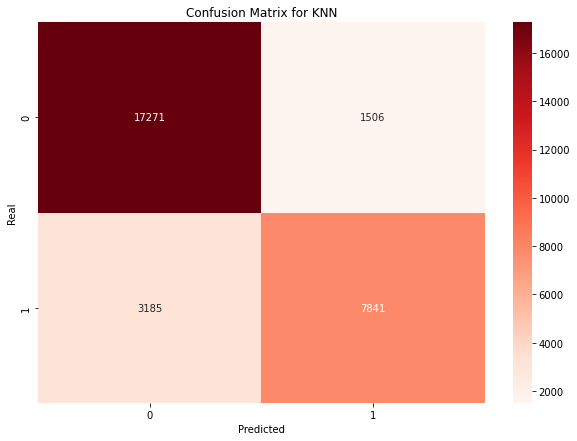

In [138]:
prediction_knn=grid_knn.predict(X_test)
grid_knn_matrix = confusion_matrix(y_test, prediction_knn)

plt.figure(figsize=(10,7))
p = sns.heatmap(grid_knn_matrix, annot=True, cmap="Reds", fmt='g')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

In [139]:
from sklearn.metrics import recall_score,  precision_score,jaccard_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

In [140]:
acc_score_knn=round(accuracy_score(y_test, prediction_knn),2)
jaccard_score_knn=round(jaccard_score(y_test , prediction_knn),2)
f1_score_knn=round(f1_score(y_test, prediction_knn),2)
precision_score_knn=round(precision_score(y_test, prediction_knn),2)
recall_score_knn=round(recall_score(y_test , prediction_knn),2)

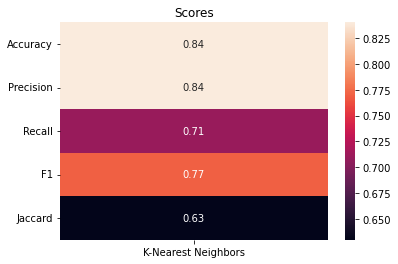

In [141]:
def show_scores(scores, names):
    sns.heatmap(scores.T,annot=True, fmt='g', xticklabels=names, yticklabels=['Accuracy', 'Precision', 'Recall', 'F1', 'Jaccard'])
    plt.title('Scores')
    plt.show()

scores = np.array([[acc_score_knn, precision_score_knn, recall_score_knn, f1_score_knn, jaccard_score_knn]]) 

show_scores(scores,['K-Nearest Neighbors']) 

In [146]:
RF=RandomForestClassifier()


grid_rf = GridSearchCV(RF, param_grid={'n_estimators': [100, 500, 1000, 2000 ], 'criterion':['gini', 'entropy', 'log_loss']}, cv=5, scoring='accuracy',  return_train_score=False)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [100, 500, 1000, 2000]},
             scoring='accuracy')

In [148]:
print(grid_rf.best_params_)

{'criterion': 'gini', 'n_estimators': 2000}


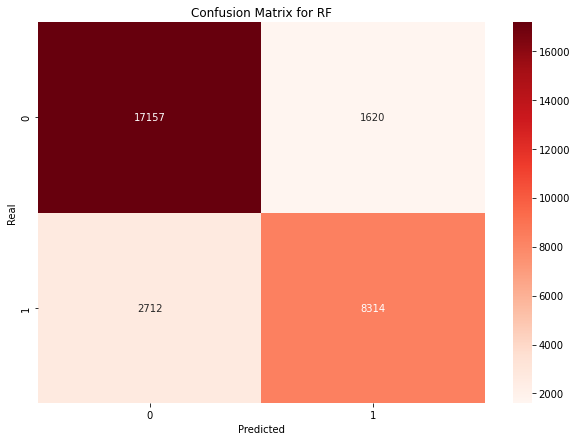

In [149]:
prediction_rf=grid_rf.predict(X_test)
grid_rf_matrix = confusion_matrix(y_test, prediction_rf)

plt.figure(figsize=(10,7))
p = sns.heatmap(grid_rf_matrix, annot=True, cmap="Reds", fmt='g')
plt.title('Confusion Matrix for RF')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

In [150]:
acc_score_rf=round(accuracy_score(y_test, prediction_rf),2)
jaccard_score_rf=round(jaccard_score(y_test , prediction_rf),2)
f1_score_rf=round(f1_score(y_test, prediction_rf),2)
precision_score_rf=round(precision_score(y_test, prediction_rf),2)
recall_score_rf=round(recall_score(y_test , prediction_rf),2)

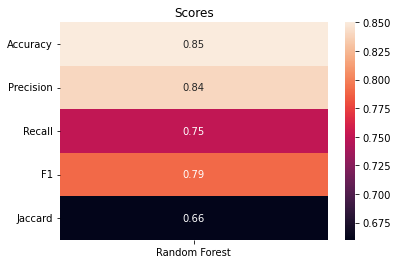

In [151]:
def show_scores(scores, names):
    sns.heatmap(scores.T,annot=True, fmt='g', xticklabels=names, yticklabels=['Accuracy', 'Precision', 'Recall', 'F1', 'Jaccard'])
    plt.title('Scores')
    plt.show()

scores = np.array([[acc_score_rf, precision_score_rf, recall_score_rf, f1_score_rf, jaccard_score_rf]]) 

show_scores(scores,['Random Forest']) 

In [154]:
LR=LogisticRegression()


grid_lr = GridSearchCV(LR, param_grid={'C' : [0.001, 0.01, 0.5], 'solver': ['liblinear', 'newton-cg', 'saga'] , 'max_iter': [100, 1000, 3000] }, cv=5, scoring='accuracy', return_train_score=False)
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.5], 'max_iter': [100, 1000, 3000],
                         'solver': ['liblinear', 'newton-cg', 'saga']},
             scoring='accuracy')

In [155]:
print(grid_lr.best_params_)

{'C': 0.5, 'max_iter': 3000, 'solver': 'saga'}


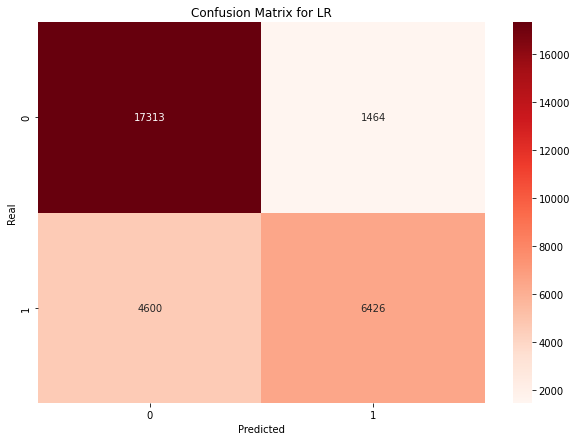

In [156]:
prediction_lr=grid_lr.predict(X_test)
grid_lr_matrix = confusion_matrix(y_test, prediction_lr)

plt.figure(figsize=(10,7))
p = sns.heatmap(grid_lr_matrix, annot=True, cmap="Reds", fmt='g')
plt.title('Confusion Matrix for LR')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

In [157]:
acc_score_lr=round(accuracy_score(y_test, prediction_lr),2)
jaccard_score_lr=round(jaccard_score(y_test , prediction_lr),2)
f1_score_lr=round(f1_score(y_test, prediction_lr),2)
precision_score_lr=round(precision_score(y_test, prediction_lr),2)
recall_score_lr=round(recall_score(y_test , prediction_lr),2)

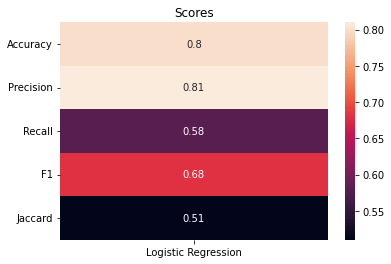

In [158]:
def show_scores(scores, names):
    sns.heatmap(scores.T,annot=True, fmt='g', xticklabels=names, yticklabels=['Accuracy', 'Precision', 'Recall', 'F1', 'Jaccard'])
    plt.title('Scores')
    plt.show()

scores = np.array([[acc_score_lr, precision_score_lr, recall_score_lr, f1_score_lr, jaccard_score_lr]]) 

show_scores(scores,['Logistic Regression']) 